In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa
from utils.util_2 import data_generation
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import IPython.display as ipd
import warnings
warnings.filterwarnings("ignore")

**Before this exercise, please install the library:**

- librosa: -c conda-forge librosa

### Task 1: Classification of Dogs and Cats (Bonus 1)

In this task you need to classify the dogs and cats based on the voice data using ML-based classifiers, e.g., KNN, SVM, and Randomforest.

**a)** Load the dog-cat-voice-classification data. The **data_generation** function returns: the voice data, the labels, and the sampling rate.

In [72]:
# X is a list, each element of which is a sample of dog's (or cat's) voice.
# y is a array, each element of which is a label of dog (1) or cats (0).

X, y, wav_rate = data_generation()

in the data, there is 164 cats (0) and 113 dogs (1)


Using [**Audio**](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) function to play an example of the voice data.

In [73]:
example = X[0]

In [74]:
from IPython.display import Audio
Audio(example, rate=wav_rate)

Visualize the example using **plt.plot()**

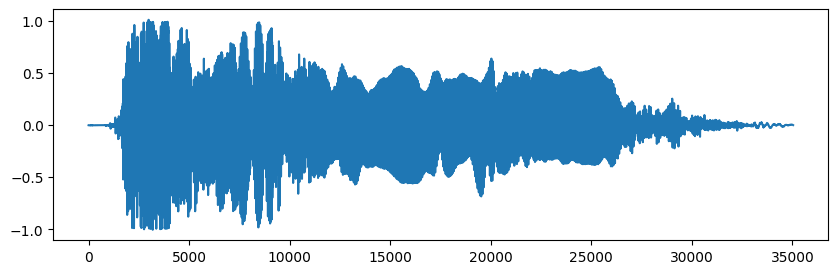

In [75]:
plt.figure(figsize=(10,3))
plt.plot(example)
plt.show()

**b)** Use the given function **extract_features()** to extract features from the raw voice data and then split samples into **training dataset** (67% of the whole dataset) and **test dataset** (33% of the whole dataset).

In [76]:
# Split the X, y into training and test dataset with a test_size=0.33
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
def extract_features(audio_samples, sample_rate):
    '''
    In this function, acoustic features, i.e. zero-crossing features, mfccs features, 
    and spectral centroid features, are extracted and will be applied to classify.
    Anyone who are interested in adding additional features in this function can visit the website:
    https://librosa.org/doc/main/feature.html
    '''
    
    extracted_features = np.empty((0, 82, ))
    if not isinstance(audio_samples, list):
        audio_samples = [audio_samples]
        
    for sample in audio_samples:
        # calculate the zero-crossing feature
        zero_cross_feat = librosa.feature.zero_crossing_rate(sample).mean()
        
        # calculate the mfccs features
        mfccs = librosa.feature.mfcc(y=sample, sr=sample_rate, n_mfcc=80)
        mfccs_scaled = np.mean(mfccs.T,axis=0)
        
        # calculate the spectral centroid
        centroid = librosa.feature.spectral_centroid(y=sample, sr=sample_rate)
        centroid_scaled = np.mean(centroid)
            
        # add zero crossing feature to the feature list
        feature = np.append(mfccs_scaled, [zero_cross_feat, centroid_scaled])
        feature = feature.reshape(1, 82)
        
        extracted_features = np.vstack((extracted_features, feature))

    # return the extracted features
    return extracted_features

In [78]:
X_train_features = extract_features(X_train, wav_rate)
X_test_features = extract_features(X_test, wav_rate)

**c)** Standardize the dataset using **StandardScaler()**.

In [79]:
scaler_train = StandardScaler().fit(X_train_features)
scaler_test = StandardScaler().fit(X_test_features)
X_train_scaled = scaler_train.transform(X_train_features)
X_test_scaled = scaler_test.transform(X_test_features)

**d)** **Implement** the classifiers: KNN, SVM, and Randomforest. **Optimize** the hyperparameters of these classifiers using grid search and **test** the models using K-Fold cross-validation. **Evaluate** these classifiers with respect to precision, recall, f1-score, accuracy.

**Hints**:

(1) Refer to the functions: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), [KNeighborsClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier), [SVC()](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC), [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier), and [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification_report#sklearn.metrics.classification_report).

(2) What are the adjustable hyperparameters of these classifiers?

(3) Figure out the what these evaluation metrics are.

In [80]:
# import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

scores = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1-score': make_scorer(f1_score),
    'accuracy': make_scorer(accuracy_score)
}

In [81]:
## KNeighborsClassifier
params = {
    'n_neighbors': [3,5,7],
    'leaf_size': range(20,40)
}

knn = GridSearchCV(KNeighborsClassifier(), param_grid=params, scoring=scores, refit='accuracy')
knn.fit(X_train_scaled, y_train)
knn.best_score_

0.8644599303135887

In [88]:
## SVC
params = {
    'C': range(1,1000,50),
    'gamma': np.arange(0,1,0.1)
}

svc = GridSearchCV(SVC(), param_grid=params, scoring=scores, refit='accuracy')
svc.fit(X_train_scaled, y_train)
svc.best_score_

0.6569105691056911

In [ ]:
## RandomForestClassifier

####################
# Your Code Here   #
####################

**e)** **Feature selection**. Estimate the importances of the extracted features (82 features in all) using **RandomForestClassifier** and re-training the classifers after reducing the redundant features. 


Hint:
- Use the Attribute feature_importances_ from the RandomForestClassifier

- Refer to: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


In [ ]:
# We select the first 30 features after ranking. You can try to explore the optimal number of features.
####################
# Your Code Here   #
####################

In [ ]:
## Retraining KNeighborsClassifier with the ranked features.

####################
# Your Code Here   #
####################

In [ ]:
## Retraining SVC with the ranked features.

####################
# Your Code Here   #
####################

In [ ]:
## Retraining RandomForestClassifier with the ranked features.

####################
# Your Code Here   #
####################